<a href="https://colab.research.google.com/github/root-epifit/Graphs/blob/main/Week_2/HW2/hw2-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание 2, задача 2. Поиск стока или треугольника

В этом ноутбуке требуется в данном *турнире* (ориентированном графе, в котором между каждыми двумя вершинами есть ребро ровно в одну сторону) найти либо сток, либо треугольник (ориентированный цикл на трех вершинах). Для этого можно воспользоваться алгоритмом с занятия, в котором находится сток или цикл. После этого можно найти цикл длины 3.


---
**Правила сдачи.** Это вторая из двух задач домашнего задания 2. Каждая задача оценивается в 5 баллов.

Дедлайн второго домашнего задания --- **22 февраля в 19:00**. Решения нужно отправить по адресу pygraphs.sber@gmail.com. Решения будут проверены до 19:00 23 февраля. 

Также можно отправить решения до **19:00 20 февраля**. Тогда они будут проверены до 19:00 21 февраля и в случае наличия ошибок можно будет успеть их исправить до основного дедлайна.

---

In [233]:
# Добавляем библиотеки, определяем функцию для рисования графа

import networkx as nx
import matplotlib.pyplot as plt

pos = {'A': (1, 1.5), 'B': (4, 0), 'C': (5, 2), 'D': (2.9, 2.2), 'E': (6, 0.5), 'F': (7.5, 1.5)}

def draw_G(G, axis=False, pos=None):
    options = {
        "font_size": 20,
        "node_size": 1000,
        "node_color": "white",
        "edgecolors": "black",
        "linewidths": 3,
        "width": 2,
    }

    if axis:
        plt.axis([0, 8.5, -0.5, 2.7])
    nx.draw_networkx(G, pos, **options)
    plt.show()
    


In [234]:
# В этом блоке находим либо сток, либо цикл, это было реализовано на занятии

def sink(G, v):
    return len(G[v]) == 0


def find_cycle_or_sink(G, v):
    for _ in range(G.number_of_nodes()):
        if sink(G, v):
            return v
        v = list(G[v])[0]
    return v

def build_cycle(G, v):
    cycle = [ v ]
    while list(G[v])[0] != cycle[0]:
        u = list(G[v])[0]
        cycle.append(u)
        v = u
    return cycle


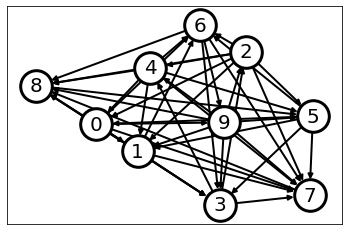

Цикл: [3, 2, 0, 1]
Треугольник: [2, 0, 3]


In [269]:
# В этом блоке нужно реализовать поиск стока или треугольника

# Здесь задается случайный турнир
n = 10
H = nx.algorithms.tournament.random_tournament(n)
draw_G(H)

# Здесь задается турнир, в котором почти является ациклическим, но ребро из стока в исток развернуто
# Этот турнир может быть полезен для тестирования
#H = nx.DiGraph()
#H.add_nodes_from(range(10))
#for j in H.nodes():
#  for i in range(j):
#    if (i, j) == (0, 9):
#      H.add_edge(j,i)  
#    else:
#      H.add_edge(i,j)


# В этой функции требуется реализовать поиск треугольника по данному циклу
def trim_cycle(G, cycle):
    # Добавьте здесь ваше решение

    def init(v):
        global path, depth, visited, path_found
        path = [v]                       # Стартовая вершина треугольника
        depth = 0
        visited = {i:False for i in cycle}
        path_found = False

    def get_next_nodes(G, v, cycle):
        # список ближайших соседей по циклу
        return [i for i in list(G[v]) if i in cycle]

    def is_u_next(u, next_nodes):
        # проверяем является ли u ближайшим соседом
        return u in next_nodes
    
    def get_triangle():
        # возвращает массив вершин треугольника в направлении обхода
        return path[::-1]

    def is_triangle_found(G, u, v, cycle=cycle):
        # стартует от вершины u и проверяет можно ли собрать 
        # треугольник из u и нисходящих вершин
        # глубину поиска ограничиваем 3-мя вершинами  
        global depth, visited, path_found, path
        depth = depth + 1
        visited[v] = True
        next_nodes = get_next_nodes(G,v,cycle)    # соседние вершины
        path_found = is_u_next(u, next_nodes)     # проверяем, является ли u соседом
        if not path_found:
            # прямого пути к u нет, проверяем есть ли путь через через соседние вершины 
            for v in next_nodes:
                if not visited[v] and depth <= 2:
                    if is_triangle_found(G,u,v,cycle):
                        # нашли треугольник
                        path.append(v)
                        break;                    # остальных соседей не смотрим
        depth = depth -1
        return path_found

    for node in cycle:
        init(node)
        if is_triangle_found(G, node, node, cycle):
            return get_triangle()     
        else:
            return "ERROR: Треугольник не найден"
    # end trim_cycle


# В этой части тестируется решение
v = find_cycle_or_sink(H, n - 1)
if sink(H, v):
    print(f'Сток: {v}')
else:
    cycle = build_cycle(H, v)
    print(f'Цикл: {cycle}')
    print(f'Треугольник: {trim_cycle(H, cycle)}')